### Student Information
Name: 龔友謙

Student ID: 112030512

GitHub ID: Albert-Kung

Kaggle name: Patrick

Kaggle private scoreboard snapshot: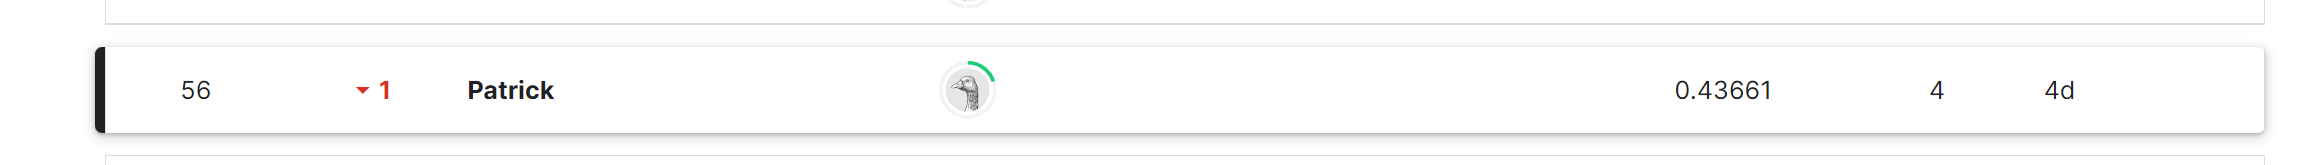

[Snapshot](img/pic0.png)

---

### Instructions

1. First: __This part is worth 30% of your grade.__ Do the **take home** exercises in the DM2023-Lab2-master. You may need to copy some cells from the Lab notebook to this notebook. 


2. Second: __This part is worth 30% of your grade.__ Participate in the in-class [Kaggle Competition](https://www.kaggle.com/t/09b1d0f3f8584d06848252277cb535f2) regarding Emotion Recognition on Twitter by this link https://www.kaggle.com/t/09b1d0f3f8584d06848252277cb535f2. The scoring will be given according to your place in the Private Leaderboard ranking: 
    - **Bottom 40%**: Get 20% of the 30% available for this section.

    - **Top 41% - 100%**: Get (60-x)/6 + 20 points, where x is your ranking in the leaderboard (ie. If you rank 3rd your score will be (60-3)/6 + 20 = 29.5% out of 30%)   
    Submit your last submission __BEFORE the deadline (Dec. 27th 11:59 pm, Wednesday)_. Make sure to take a screenshot of your position at the end of the competition and store it as '''pic0.png''' under the **img** folder of this repository and rerun the cell **Student Information**.
    

3. Third: __This part is worth 30% of your grade.__ A report of your work developping the model for the competition (You can use code and comment it). This report should include what your preprocessing steps, the feature engineering steps and an explanation of your model. You can also mention different things you tried and insights you gained. 


4. Fourth: __This part is worth 10% of your grade.__ It's hard for us to follow if your code is messy :'(, so please **tidy up your notebook** and **add minimal comments where needed**.


Upload your files to your repository then submit the link to it on the corresponding e-learn assignment.

Make sure to commit and save your changes to your repository __BEFORE the deadline (Dec. 31th 11:59 pm, Sunday)__. 

# Part1

---
## 1. Data Preparation

In [11]:
!pip install scikit-learn
!pip install pandas
!pip install numpy
!pip install matplotlib
!pip install plotly
!pip install seaborn
!pip install nltk
!pip install gensim
!pip install tensorflow
!pip install keras
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import nltk
import seaborn as sns

## 1.1 Load data

We start by loading the csv files into a single pandas dataframe for training and one for testing.

In [12]:
import pandas as pd

### training data
anger_train = pd.read_csv("data/semeval/train/anger-ratings-0to1.train.txt",
                         sep="\t", header=None,names=["id", "text", "emotion", "intensity"])
sadness_train = pd.read_csv("data/semeval/train/sadness-ratings-0to1.train.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
fear_train = pd.read_csv("data/semeval/train/fear-ratings-0to1.train.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
joy_train = pd.read_csv("data/semeval/train/joy-ratings-0to1.train.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])

In [13]:
# combine 4 sub-dataset
train_df = pd.concat([anger_train, fear_train, joy_train, sadness_train], ignore_index=True)

In [14]:
### testing data
anger_test = pd.read_csv("data/semeval/dev/anger-ratings-0to1.dev.gold.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
sadness_test = pd.read_csv("data/semeval/dev/sadness-ratings-0to1.dev.gold.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
fear_test = pd.read_csv("data/semeval/dev/fear-ratings-0to1.dev.gold.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
joy_test = pd.read_csv("data/semeval/dev/joy-ratings-0to1.dev.gold.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])

# combine 4 sub-dataset
test_df = pd.concat([anger_test, fear_test, joy_test, sadness_test], ignore_index=True)
train_df.head()

,id,text,emotion,intensity
0,10000,How the fu*k! Who the heck! moved my fridge!.....,anger,0.938
1,10001,So my Indian Uber driver just called someone t...,anger,0.896
2,10002,@DPD_UK I asked for my parcel to be delivered ...,anger,0.896
3,10003,so ef whichever butt wipe pulled the fire alar...,anger,0.896
4,10004,Don't join @BTCare they put the phone down on ...,anger,0.896


In [15]:
# shuffle dataset
train_df = train_df.sample(frac=1)
test_df = test_df.sample(frac=1)

In [16]:
print("Shape of Training df: ", train_df.shape)
print("Shape of Testing df: ", test_df.shape)

Shape of Training df:  (3613, 4)
Shape of Testing df:  (347, 4)


---
### ** >>> Exercise 1 (Take home): **  
Plot word frequency for Top 30 words in both train and test dataset. (Hint: refer to DM lab 1)

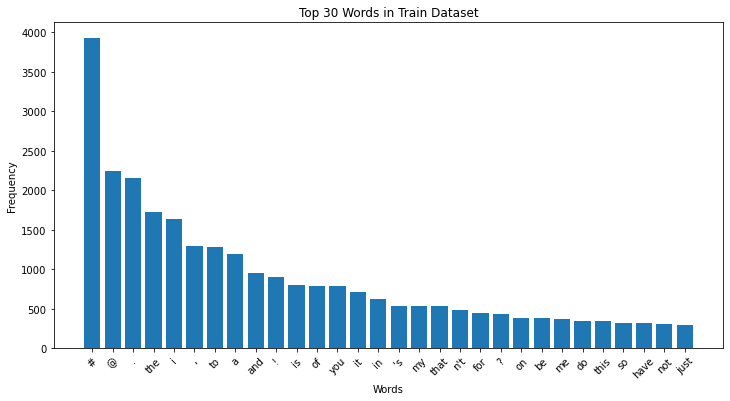

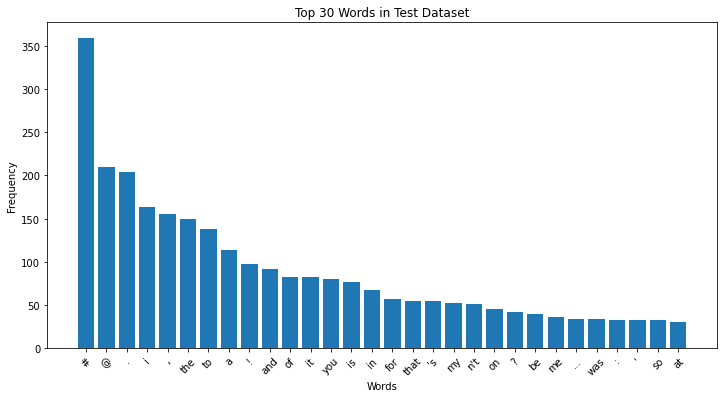

In [17]:
from nltk import FreqDist
from nltk.tokenize import word_tokenize
train_tokens = [word.lower() for text in train_df['text'] for word in word_tokenize(str(text))]
train_freq_dist = FreqDist(train_tokens)
train_top_words = train_freq_dist.most_common(30)

# Tokenize and calculate word frequencies for test dataset
test_tokens = [word.lower() for text in test_df['text'] for word in word_tokenize(str(text))]
test_freq_dist = FreqDist(test_tokens)
test_top_words = test_freq_dist.most_common(30)

# Plot word frequency for train dataset
plt.figure(figsize=(12, 6))
plt.bar(*zip(*train_top_words))
plt.title('Top 30 Words in Train Dataset')
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()

# Plot word frequency for test dataset
plt.figure(figsize=(12, 6))
plt.bar(*zip(*test_top_words))
plt.title('Top 30 Words in Test Dataset')
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()

---
### 1.2 Save data

In [18]:
## save to pickle file
train_df.to_pickle("train_df.pkl") 
test_df.to_pickle("test_df.pkl")

In [19]:
train_df = pd.read_pickle("train_df.pkl")
test_df = pd.read_pickle("test_df.pkl")

---
### 1.3 Exploratory data analysis (EDA)

Again, before getting our hands dirty, we need to explore a little bit and understand the data we're dealing with.

In [20]:
train_df['emotion'].unique()

array(['fear', 'joy', 'sadness', 'anger'], dtype=object)

In [21]:
# group to find distribution
train_df.groupby(['emotion']).count()['text']

emotion
anger       857
fear       1147
joy         823
sadness     786
Name: text, dtype: int64

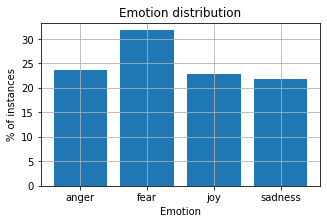

In [22]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

# the histogram of the data
labels = train_df['emotion'].unique()
post_total = len(train_df)
df1 = train_df.groupby(['emotion']).count()['text']
df1 = df1.apply(lambda x: round(x*100/post_total,3))

#plot
fig, ax = plt.subplots(figsize=(5,3))
plt.bar(df1.index,df1.values)

#arrange
plt.ylabel('% of instances')
plt.xlabel('Emotion')
plt.title('Emotion distribution')
plt.grid(True)
plt.show()

## 2. Feature engineering
### Using Bag of Words
Using scikit-learn ```CountVectorizer``` perform word frequency and use these as features to train a model.  
http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html

In [23]:
from sklearn.feature_extraction.text import CountVectorizer

In [24]:
# build analyzers (bag-of-words)
BOW_vectorizer = CountVectorizer() 

In [25]:
# 1. Learn a vocabulary dictionary of all tokens in the raw documents.
BOW_vectorizer.fit(train_df['text'])

# 2. Transform documents to document-term matrix.
train_data_BOW_features = BOW_vectorizer.transform(train_df['text'])
test_data_BOW_features = BOW_vectorizer.transform(test_df['text'])

In [26]:
# check the result
train_data_BOW_features

<3613x10115 sparse matrix of type '<class 'numpy.int64'>'
	with 51467 stored elements in Compressed Sparse Row format>

In [27]:
type(train_data_BOW_features)

scipy.sparse.csr.csr_matrix

In [28]:
# add .toarray() to show
train_data_BOW_features.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [29]:
# check the dimension
train_data_BOW_features.shape

(3613, 10115)

In [30]:
# observe some feature names
feature_names = BOW_vectorizer.get_feature_names_out()
feature_names[100:110]

array(['2k17', '2much', '2nd', '30', '300', '301', '30am', '30pm', '30s',
       '31'], dtype=object)

In [31]:
"😂" in feature_names

False

In [32]:
import nltk
nltk.download('punkt')

# build analyzers (bag-of-words)
BOW_500 = CountVectorizer(max_features=500, tokenizer=nltk.word_tokenize) 

# apply analyzer to training data
BOW_500.fit(train_df['text'])

train_data_BOW_features_500 = BOW_500.transform(train_df['text'])

## check dimension
train_data_BOW_features_500.shape

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
C:\Users\user\anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:516: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


(3613, 500)

In [33]:
train_data_BOW_features_500.toarray()

array([[0, 6, 0, ..., 0, 0, 0],
       [0, 6, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [34]:
# observe some feature names
feature_names_500 = BOW_500.get_feature_names_out()
feature_names_500[100:110]

array(['change', 'cheer', 'cheerful', 'cheerfully', 'cheering', 'cheery',
       'come', 'comes', 'could', 'country'], dtype=object)

In [35]:
"😂" in feature_names_500

True

---
### ** >>> Exercise 2 (Take home): **  
Generate an embedding using the TF-IDF vectorizer instead of th BOW one with 1000 features and show the feature names for features [100:110].

In [36]:
from sklearn.feature_extraction.text import TfidfVectorizer

TFIDF_1000 = TfidfVectorizer(max_features=1000, tokenizer=nltk.word_tokenize)
TFIDF_1000.fit(train_df['text'])
train_data_TFIDF_features_1000 = TFIDF_1000.transform(train_df['text'])
train_data_TFIDF_features_1000.toarray()

feature_names_1000 = TFIDF_1000.get_feature_names_out()
feature_names_1000[100:110]


array(['awful', 'b', 'baby', 'back', 'bad', 'ball', 'balls', 'bb18', 'bc',
       'bday'], dtype=object)

---
## 3. Model
### 3.1 Decision Trees
Using scikit-learn ```DecisionTreeClassifier``` performs word frequency and uses these as features to train a model.  
http://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html#sklearn.tree.DecisionTreeClassifier

In [37]:
from sklearn.tree import DecisionTreeClassifier

# for a classificaiton problem, you need to provide both training & testing data
X_train = BOW_500.transform(train_df['text'])
y_train = train_df['emotion']

X_test = BOW_500.transform(test_df['text'])
y_test = test_df['emotion']

## take a look at data dimension is a good habit  :)
print('X_train.shape: ', X_train.shape)
print('y_train.shape: ', y_train.shape)
print('X_test.shape: ', X_test.shape)
print('y_test.shape: ', y_test.shape)

X_train.shape:  (3613, 500)
y_train.shape:  (3613,)
X_test.shape:  (347, 500)
y_test.shape:  (347,)


In [38]:
## build DecisionTree model
DT_model = DecisionTreeClassifier(random_state=1)

## training!
DT_model = DT_model.fit(X_train, y_train)

## predict!
y_train_pred = DT_model.predict(X_train)
y_test_pred = DT_model.predict(X_test)

## so we get the pred result
y_test_pred[:10]

array(['fear', 'fear', 'sadness', 'sadness', 'anger', 'fear', 'joy',
       'anger', 'anger', 'joy'], dtype=object)

---
## 4. Results Evaluation

In [39]:
## accuracy
from sklearn.metrics import accuracy_score

acc_train = accuracy_score(y_true=y_train, y_pred=y_train_pred)
acc_test = accuracy_score(y_true=y_test, y_pred=y_test_pred)

print('training accuracy: {}'.format(round(acc_train, 2)))
print('testing accuracy: {}'.format(round(acc_test, 2)))


training accuracy: 0.99
testing accuracy: 0.68


In [40]:
## precision, recall, f1-score,
from sklearn.metrics import classification_report

print(classification_report(y_true=y_test, y_pred=y_test_pred))

              precision    recall  f1-score   support

       anger       0.66      0.68      0.67        84
        fear       0.66      0.69      0.67       110
         joy       0.72      0.71      0.71        79
     sadness       0.70      0.64      0.67        74

    accuracy                           0.68       347
   macro avg       0.68      0.68      0.68       347
weighted avg       0.68      0.68      0.68       347



In [41]:
## check by confusion matrix
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_true=y_test, y_pred=y_test_pred) 
print(cm)

[[57 18  6  3]
 [16 76  9  9]
 [ 6  9 56  8]
 [ 7 13  7 47]]


In [42]:
# Function for visualizing confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import itertools

def plot_confusion_matrix(cm, classes, title='Confusion matrix',
                          cmap=sns.cubehelix_palette(as_cmap=True)):
    """
    This function is modified from: 
    http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html
    """
    classes.sort()
    tick_marks = np.arange(len(classes))    
    
    fig, ax = plt.subplots(figsize=(5,5))
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           xticklabels = classes,
           yticklabels = classes,
           title = title,
           xlabel = 'True label',
           ylabel = 'Predicted label')

    fmt = 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt), horizontalalignment="center", color="white" if cm[i, j] > thresh else "black")
    ylim_top = len(classes) - 0.5
    plt.ylim([ylim_top, -.5])
    plt.tight_layout()
    plt.show()

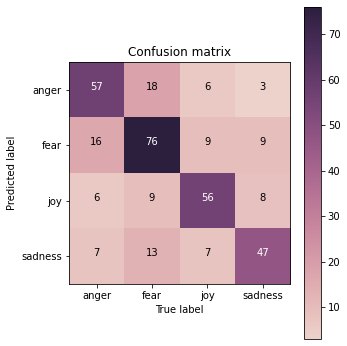

In [43]:
# plot your confusion matrix
my_tags = ['anger', 'fear', 'joy', 'sadness']
plot_confusion_matrix(cm, classes=my_tags, title='Confusion matrix')

---
### ** >>> Exercise 3 (Take home): **  
Can you interpret the results above? What do they mean?

#### Answer here
#### Fear seems to have the highest rate to be predicted, it means in training part many of the anger and fear may be recognized as fear.
#### It may cause the fear to predict coreect more easily but others label do not, causing low F1-score.

---
### ** >>> Exercise 4 (Take home): **  
Build a model using a ```Naive Bayes``` model and train it. What are the testing results? 

*Reference*: https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.MultinomialNB.html

In [44]:
# Answer here
from sklearn.naive_bayes import MultinomialNB
clf = MultinomialNB()
clf.fit(X_train, y_train)
y_train_pred_NB=clf.predict(X_train)
y_test_pred_NB=clf.predict(X_test)

In [45]:
print(classification_report(y_true=y_test, y_pred=y_test_pred_NB))

              precision    recall  f1-score   support

       anger       0.63      0.65      0.64        84
        fear       0.73      0.77      0.75       110
         joy       0.78      0.71      0.74        79
     sadness       0.64      0.62      0.63        74

    accuracy                           0.70       347
   macro avg       0.70      0.69      0.69       347
weighted avg       0.70      0.70      0.70       347



---
### ** >>> Exercise 5 (Take home): **  

How do the results from the Naive Bayes model and the Decision Tree model compare? How do you interpret these differences? Use the theoretical background covered in class to try and explain these differences.

In [46]:
# Decision Tree
print(classification_report(y_true=y_test, y_pred=y_test_pred))

              precision    recall  f1-score   support

       anger       0.66      0.68      0.67        84
        fear       0.66      0.69      0.67       110
         joy       0.72      0.71      0.71        79
     sadness       0.70      0.64      0.67        74

    accuracy                           0.68       347
   macro avg       0.68      0.68      0.68       347
weighted avg       0.68      0.68      0.68       347



In [47]:
# Decision Tree
acc_train = accuracy_score(y_true=y_train, y_pred=y_train_pred)
acc_test = accuracy_score(y_true=y_test, y_pred=y_test_pred)

print('training accuracy: {}'.format(round(acc_train, 2)))
print('testing accuracy: {}'.format(round(acc_test, 2)))

training accuracy: 0.99
testing accuracy: 0.68


In [48]:
# Naive Bayes
print(classification_report(y_true=y_test, y_pred=y_test_pred_NB))

              precision    recall  f1-score   support

       anger       0.63      0.65      0.64        84
        fear       0.73      0.77      0.75       110
         joy       0.78      0.71      0.74        79
     sadness       0.64      0.62      0.63        74

    accuracy                           0.70       347
   macro avg       0.70      0.69      0.69       347
weighted avg       0.70      0.70      0.70       347



In [49]:
# Naive Bayes
acc_train = accuracy_score(y_true=y_train, y_pred=y_train_pred_NB)
acc_test = accuracy_score(y_true=y_test, y_pred=y_test_pred_NB)

print('training accuracy: {}'.format(round(acc_train, 2)))
print('testing accuracy: {}'.format(round(acc_test, 2)))

training accuracy: 0.79
testing accuracy: 0.7


#### Answer here
#### From the result of training accuracy, testing accuracy. We can see that Decision Tree has a really high training accuracy but low testing accuracy.
#### From my knowledge I can conclude that Decision Tree seems to be more overfitting compared to Naive Bayes.

---
## 6. Deep Learning

We use [Keras](https://keras.io/) to be our deep learning framwork, and follow the [Model (functional API)](https://keras.io/models/model/) to build a Deep Neural Network (DNN) model. Keras runs with Tensorflow in the backend. It's a nice abstraction to start working with NN models. 

Because Deep Learning is a 1-semester course, we can't talk about each detail about it in the lab session. Here, we only provide a simple template about how to build & run a DL model successfully. You can follow this template to design your model.

We will begin by building a fully connected network, which looks like this:

In [50]:
import keras

# standardize name (X, y) 
X_train = BOW_500.transform(train_df['text'])
y_train = train_df['emotion']

X_test = BOW_500.transform(test_df['text'])
y_test = test_df['emotion']

## check dimension is a good habbit 
print('X_train.shape: ', X_train.shape)
print('y_train.shape: ', y_train.shape)
print('X_test.shape: ', X_test.shape)
print('y_test.shape: ', y_test.shape)

X_train.shape:  (3613, 500)
y_train.shape:  (3613,)
X_test.shape:  (347, 500)
y_test.shape:  (347,)


In [51]:
## deal with label (string -> one-hot)

from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
label_encoder.fit(y_train)
print('check label: ', label_encoder.classes_)
print('\n## Before convert')
print('y_train[0:4]:\n', y_train[0:4])
print('\ny_train.shape: ', y_train.shape)
print('y_test.shape: ', y_test.shape)

def label_encode(le, labels):
    enc = le.transform(labels)
    return keras.utils.to_categorical(enc)

def label_decode(le, one_hot_label):
    dec = np.argmax(one_hot_label, axis=1)
    return le.inverse_transform(dec)

y_train = label_encode(label_encoder, y_train)
y_test = label_encode(label_encoder, y_test)

print('\n\n## After convert')
print('y_train[0:4]:\n', y_train[0:4])
print('\ny_train.shape: ', y_train.shape)
print('y_test.shape: ', y_test.shape)
# I/O check
input_shape = X_train.shape[1]
print('input_shape: ', input_shape)

output_shape = len(label_encoder.classes_)
print('output_shape: ', output_shape)

check label:  ['anger' 'fear' 'joy' 'sadness']

## Before convert
y_train[0:4]:
 1140    fear
1454    fear
2087     joy
2435     joy
Name: emotion, dtype: object

y_train.shape:  (3613,)
y_test.shape:  (347,)


## After convert
y_train[0:4]:
 [[0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]]

y_train.shape:  (3613, 4)
y_test.shape:  (347, 4)
input_shape:  500
output_shape:  4


In [52]:
# I/O check
input_shape = X_train.shape[1]
print('input_shape: ', input_shape)

output_shape = len(label_encoder.classes_)
print('output_shape: ', output_shape)

input_shape:  500
output_shape:  4


In [53]:
from keras.models import Model
from keras.layers import Input, Dense
from keras.layers import ReLU, Softmax

# input layer
model_input = Input(shape=(input_shape, ))  # 500
X = model_input

# 1st hidden layer
X_W1 = Dense(units=64)(X)  # 64
H1 = ReLU()(X_W1)

# 2nd hidden layer
H1_W2 = Dense(units=64)(H1)  # 64
H2 = ReLU()(H1_W2)

# output layer
H2_W3 = Dense(units=output_shape)(H2)  # 4
H3 = Softmax()(H2_W3)

model_output = H3

# create model
model = Model(inputs=[model_input], outputs=[model_output])

# loss function & optimizer
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# show model construction
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 500)]             0         
                                                                 
 dense (Dense)               (None, 64)                32064     
                                                                 
 re_lu (ReLU)                (None, 64)                0         
                                                                 
 dense_1 (Dense)             (None, 64)                4160      
                                                                 
 re_lu_1 (ReLU)              (None, 64)                0         
                                                                 
 dense_2 (Dense)             (None, 4)                 260       
                                                                 
 softmax (Softmax)           (None, 4)                 0     

In [54]:
from keras.callbacks import CSVLogger

csv_logger = CSVLogger('logs/training_log.csv')

# training setting
epochs = 25
batch_size = 32

# training!
history = model.fit(X_train, y_train, 
                    epochs=epochs, 
                    batch_size=batch_size, 
                    callbacks=[csv_logger],
                    validation_data = (X_test, y_test))
print('training finish')

Epoch 1/25
113/113 [==============================] - 1s 3ms/step - loss: 1.3262 - accuracy: 0.3712 - val_loss: 1.2791 - val_accuracy: 0.4236
Epoch 2/25
113/113 [==============================] - 0s 2ms/step - loss: 0.9915 - accuracy: 0.6477 - val_loss: 0.9626 - val_accuracy: 0.6282
Epoch 3/25
113/113 [==============================] - 0s 2ms/step - loss: 0.5936 - accuracy: 0.7885 - val_loss: 0.7925 - val_accuracy: 0.6801
Epoch 4/25
113/113 [==============================] - 0s 2ms/step - loss: 0.4257 - accuracy: 0.8392 - val_loss: 0.7859 - val_accuracy: 0.7089
Epoch 5/25
113/113 [==============================] - 0s 2ms/step - loss: 0.3387 - accuracy: 0.8788 - val_loss: 0.8272 - val_accuracy: 0.6945
Epoch 6/25
113/113 [==============================] - 0s 2ms/step - loss: 0.2738 - accuracy: 0.9045 - val_loss: 0.8961 - val_accuracy: 0.7003
Epoch 7/25
113/113 [==============================] - 0s 2ms/step - loss: 0.2299 - accuracy: 0.9239 - val_loss: 0.9527 - val_accuracy: 0.6744
Epoch 

In [55]:
## predict
pred_result = model.predict(X_test, batch_size=128)
pred_result[:5]

3/3 [==============================] - 0s 3ms/step


array([[3.5738644e-01, 6.4002258e-01, 4.5783136e-06, 2.5864169e-03],
       [3.2803226e-02, 2.4280633e-01, 1.8674474e-04, 7.2420371e-01],
       [4.5543049e-02, 9.2958227e-02, 2.2186083e-04, 8.6127692e-01],
       [7.5538825e-05, 9.7289586e-01, 2.0799262e-09, 2.7028609e-02],
       [4.4841659e-03, 3.0468134e-02, 9.6503842e-01, 9.2608561e-06]],
      dtype=float32)

In [56]:
pred_result = label_decode(label_encoder, pred_result)
pred_result[:5]

array(['fear', 'sadness', 'sadness', 'fear', 'joy'], dtype=object)

In [57]:
from sklearn.metrics import accuracy_score

print('testing accuracy: {}'.format(round(accuracy_score(label_decode(label_encoder, y_test), pred_result), 2)))

testing accuracy: 0.68


In [58]:
#Let's take a look at the training log
training_log = pd.DataFrame()
training_log = pd.read_csv("logs/training_log.csv")
training_log

,epoch,accuracy,loss,val_accuracy,val_loss
0,0,0.371160,1.326249,0.423631,1.279082
1,1,0.647661,0.991523,0.628242,0.962650
2,2,0.788541,0.593592,0.680115,0.792503
3,3,0.839192,0.425739,0.708934,0.785941
4,4,0.878771,0.338730,0.694524,0.827178
5,5,0.904512,0.273783,0.700288,0.896097
6,6,0.923886,0.229863,0.674352,0.952736
7,7,0.937171,0.196873,0.659942,0.985088
8,8,0.942707,0.167921,0.685879,1.051184
9,9,0.955439,0.146913,0.682997,1.056395


---
### ** >>> Exercise 6 (Take home): **  

Plot the Training and Validation Accuracy and Loss (different plots), just like the images below.(Note: the pictures below are an example from a different model). How to interpret the graphs you got? How are they related to the concept of overfitting/underfitting covered in class?
<table><tr>
    <td><img src="pics/pic3.png" style="width: 300px;"/> </td>
    <td><img src="pics/pic4.png" style="width: 300px;"/> </td>
</tr></table>

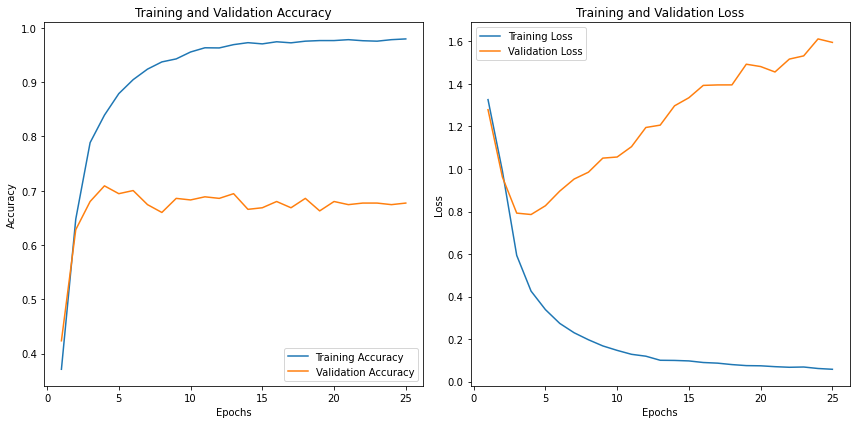

In [59]:
# Answer Here
train_acc = training_log['accuracy']
val_acc = training_log['val_accuracy']
loss_train = training_log['loss']
loss_val = training_log['val_loss']
epochs = 25

# Plotting Training and Validation Accuracy
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(range(1, epochs + 1), train_acc, label='Training Accuracy')
plt.plot(range(1, epochs + 1), val_acc, label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Plotting Training and Validation Loss
plt.subplot(1, 2, 2)
plt.plot(range(1, epochs + 1), loss_train, label='Training Loss')
plt.plot(range(1, epochs + 1), loss_val, label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

#### After 5 epochs, the accuracy seems to be stablized
#### After 5 epochs, the training loss still decreasing but the Validation loss starts to get higher
#### We can concluded that this is a sign of overfitting

---
## 7. Word2Vector

We will introduce how to use `gensim` to train your word2vec model and how to load a pre-trained model.

https://radimrehurek.com/gensim/index.html

In [60]:
## check library
import gensim

## ignore warnings
import warnings
warnings.filterwarnings('ignore')

# # if you want to see the training messages, you can use it
# import logging
# logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO)

## the input type
train_df['text_tokenized'] = train_df['text'].apply(lambda x: nltk.word_tokenize(x))
train_df[['id', 'text', 'text_tokenized']].head()

,id,text,text_tokenized
1140,20283,"@Miami4Trump Yeah, but bad part is the #terror...","[@, Miami4Trump, Yeah, ,, but, bad, part, is, ..."
1454,20597,The Zika #Hoax Files: DEET is part of a binary...,"[The, Zika, #, Hoax, Files, :, DEET, is, part,..."
2087,30083,@JackAndJack I'm so lively for listen💗😀,"[@, JackAndJack, I, 'm, so, lively, for, liste..."
2435,30431,A cheerful heart is an unending banquet.- Prov...,"[A, cheerful, heart, is, an, unending, banquet..."
3324,40497,Sometimes people leave you halfway through the...,"[Sometimes, people, leave, you, halfway, throu..."


In [61]:
## create the training corpus
training_corpus = train_df['text_tokenized'].values
training_corpus[:3]

array([list(['@', 'Miami4Trump', 'Yeah', ',', 'but', 'bad', 'part', 'is', 'the', '#', 'terrorism', '#', 'terror', 'Muslims', 'wo', "n't", 'be', 'the', 'ones', 'leaving', '#', 'ObamaLegacy', '#', 'nationalsecurity', '#', 'disaster', '#', 'Obama']),
       list(['The', 'Zika', '#', 'Hoax', 'Files', ':', 'DEET', 'is', 'part', 'of', 'a', 'binary', 'chemical', 'weapon', 'targeting', 'your', 'brain', ':', '#', 'Toxin', '#', 'neurological', '#', 'USCitizens', '#', 'Insect', '#', 'mammal']),
       list(['@', 'JackAndJack', 'I', "'m", 'so', 'lively', 'for', 'listen💗😀'])],
      dtype=object)

In [62]:
from gensim.models import Word2Vec

## setting
vector_dim = 100
window_size = 5
min_count = 1
training_epochs = 20

## model
word2vec_model = Word2Vec(sentences=training_corpus, 
                          vector_size=vector_dim, window=window_size, 
                          min_count=min_count, epochs=training_epochs)

In [63]:
# get the corresponding vector of a word
word_vec = word2vec_model.wv['happy']
word_vec

array([ 0.8412652 ,  0.46450377, -0.06244515,  0.25815728, -0.23788689,
       -1.0929496 ,  0.67784166,  1.0970279 , -0.2197115 , -0.08531152,
       -0.5591632 , -0.6989869 , -0.38227433,  0.26160344, -0.17986338,
       -0.48331323,  0.65423745, -0.5054628 ,  0.44116342, -0.7722723 ,
        0.395693  ,  0.80053747,  0.49789676,  0.06946441,  0.55105007,
        0.1269066 , -0.27643663,  0.32841644, -0.17547381,  0.44333318,
        0.1830241 , -0.27916834,  0.60733   , -0.8259795 ,  0.05112102,
        0.23894456,  0.27294448, -0.42203608, -0.29507282, -0.32974896,
       -0.14478958, -0.12224608, -0.2843222 ,  0.09490447,  0.21508358,
       -0.39724714, -0.949836  ,  0.4927296 ,  0.20927513,  0.4750246 ,
       -0.16603513, -1.0348792 , -0.17757176,  0.02921306, -0.2789222 ,
       -0.09628892,  0.14124972, -0.18981983,  0.27875543,  0.56000507,
        0.01485436, -0.33408704,  0.49845654,  0.43046907, -0.59841275,
        0.99651283,  0.40569267,  0.74887985, -1.2703506 ,  0.85

In [64]:
# Get the most similar words
word = 'happy'
topn = 10
word2vec_model.wv.most_similar(word, topn=topn)

[('Be', 0.9354918599128723),
 ('establishment', 0.9263685941696167),
 ('help', 0.9186508655548096),
 ('register', 0.9166106581687927),
 ('birthday', 0.9164410829544067),
 ('bday', 0.9151347279548645),
 ('plz', 0.9009578227996826),
 ('blessed', 0.897244393825531),
 ("'", 0.8957886099815369),
 ('drowning', 0.8928298950195312)]

In [65]:
from gensim.models import KeyedVectors

## Note: this model is very huge, this will take some time ...
model_path = "C:\\Users\\user\\Desktop\\DMLab2\\DM2023-Lab2-Master\\GoogleNews-vectors-negative300.bin"
w2v_google_model = KeyedVectors.load_word2vec_format(model_path, binary=True)
print('load ok')

w2v_google_model.most_similar('happy', topn=10)

load ok


[('glad', 0.7408890724182129),
 ('pleased', 0.6632170677185059),
 ('ecstatic', 0.6626911163330078),
 ('overjoyed', 0.6599287390708923),
 ('thrilled', 0.6514049768447876),
 ('satisfied', 0.6437950134277344),
 ('proud', 0.636042058467865),
 ('delighted', 0.627237856388092),
 ('disappointed', 0.6269949674606323),
 ('excited', 0.6247665882110596)]

In [66]:
import gensim.downloader as api

## If you see `SSL: CERTIFICATE_VERIFY_FAILED` error, use this:
import ssl
import urllib.request
ssl._create_default_https_context = ssl._create_unverified_context

glove_twitter_25_model = api.load("glove-twitter-25")
print('load ok')

glove_twitter_25_model.most_similar('happy', topn=10)

load ok


[('birthday', 0.9577817320823669),
 ('thank', 0.937666654586792),
 ('welcome', 0.93361496925354),
 ('love', 0.9176183342933655),
 ('miss', 0.9164500832557678),
 ('hello', 0.9158352017402649),
 ('thanks', 0.9150083661079407),
 ('merry', 0.9053248167037964),
 ('bless', 0.902732253074646),
 ('wish', 0.9013165235519409)]

---
### ** >>> Exercise 7 (Take home): **  

Now, we have the word vectors, but our input data is a sequence of words (or say sentence). 
How can we utilize these "word" vectors to represent the sentence data and train our model?

#### Answer here
#### We can try some method to utilize these "word" vectors, below are three methods we can try.
#### 1. Averaging: Calculate the average of all word vectors in the sequence.
#### 2. Summation: Sum up all the word vectors in the sequence.
#### 3. TF-IDF Weighted Averaging: Weight word vectors by their TF-IDF scores before averaging.

### 8. Clustering: k-means

Here we introduce how to use `sklearn` to do the basic **unsupervised learning** approach, k-means.    

more details: http://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html


In [67]:
# clustering target
target_list = ['happy', 'fear', 'angry', 'car', 'teacher', 'computer']
print('target words: ', target_list)

# convert to word vector
X = [word2vec_model.wv[word] for word in target_list]

target words:  ['happy', 'fear', 'angry', 'car', 'teacher', 'computer']


In [68]:
from sklearn.cluster import KMeans

# we have to decide how many cluster (k) we want
k = 2

# k-means model
kmeans_model = KMeans(n_clusters=k)
kmeans_model.fit(X)

# cluster result
cluster_result = kmeans_model.labels_

# show
for i in range(len(target_list)):
    print('word: {} \t cluster: {}'.format(target_list[i], cluster_result[i]))

word: happy 	 cluster: 0
word: fear 	 cluster: 0
word: angry 	 cluster: 0
word: car 	 cluster: 1
word: teacher 	 cluster: 1
word: computer 	 cluster: 1



## 9. High-dimension Visualization: t-SNE

No matter if you use the Bag-of-words, TF-IDF, or Word2Vec, it's very hard to see the embedding result, because the dimension is larger than 3.  

In Lab 1, we already talked about PCA. We can use PCA to reduce the dimension of our data, then visualize it. However, if you dig deeper into the result, you'd find it is insufficient.

Our aim will be to create a visualization similar to the one below:

In [69]:
word_list = ['happy', 'angry', 'data', 'mining']

topn = 5
happy_words = ['happy'] + [word_ for word_, sim_ in w2v_google_model.most_similar('happy', topn=topn)]
angry_words = ['angry'] + [word_ for word_, sim_ in w2v_google_model.most_similar('angry', topn=topn)]        
data_words = ['data'] + [word_ for word_, sim_ in w2v_google_model.most_similar('data', topn=topn)]        
mining_words = ['mining'] + [word_ for word_, sim_ in w2v_google_model.most_similar('mining', topn=topn)]        

print('happy_words: ', happy_words)
print('angry_words: ', angry_words)
print('data_words: ', data_words)
print('mining_words: ', mining_words)

target_words = happy_words + angry_words + data_words + mining_words
print('\ntarget words: ')
print(target_words)

print('\ncolor list:')
cn = topn + 1
color = ['b'] * cn + ['g'] * cn + ['r'] * cn + ['y'] * cn
print(color)

happy_words:  ['happy', 'glad', 'pleased', 'ecstatic', 'overjoyed', 'thrilled']
angry_words:  ['angry', 'irate', 'enraged', 'indignant', 'incensed', 'annoyed']
data_words:  ['data', 'Data', 'datasets', 'dataset', 'databases', 'statistics']
mining_words:  ['mining', 'Mining', 'mines', 'coal_mining', 'mine', 'miner']

target words: 
['happy', 'glad', 'pleased', 'ecstatic', 'overjoyed', 'thrilled', 'angry', 'irate', 'enraged', 'indignant', 'incensed', 'annoyed', 'data', 'Data', 'datasets', 'dataset', 'databases', 'statistics', 'mining', 'Mining', 'mines', 'coal_mining', 'mine', 'miner']

color list:
['b', 'b', 'b', 'b', 'b', 'b', 'g', 'g', 'g', 'g', 'g', 'g', 'r', 'r', 'r', 'r', 'r', 'r', 'y', 'y', 'y', 'y', 'y', 'y']


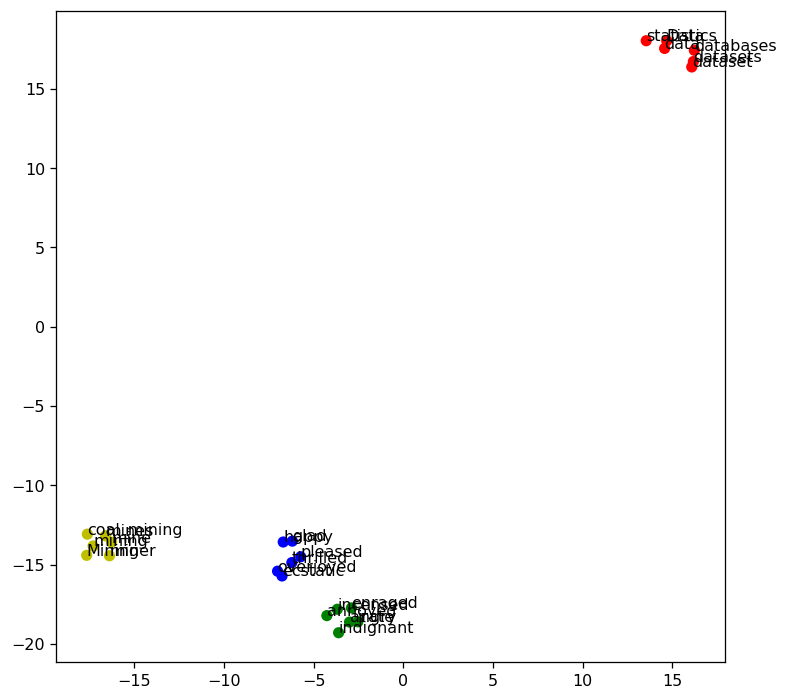

In [70]:
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

## w2v model
model = w2v_google_model

## prepare training word vectors
size = 200
target_size = len(target_words)
all_word = list(model.index_to_key)
word_train = target_words + all_word[:size]
X_train = model[word_train]

## t-SNE model
tsne = TSNE(n_components=2, metric='cosine', random_state=28)

## training
X_tsne = tsne.fit_transform(X_train)

## plot the result
plt.figure(figsize=(7.5, 7.5), dpi=115)
plt.scatter(X_tsne[:target_size, 0], X_tsne[:target_size, 1], c=color)
for label, x, y in zip(target_words, X_tsne[:target_size, 0], X_tsne[:target_size, 1]):
    plt.annotate(label, xy=(x,y), xytext=(0,0),  textcoords='offset points')
plt.show()

---
### ** >>> Exercise 8 (Take home): **  

Generate a t-SNE visualization to show the 15 words most related to the words "angry", "happy", "sad", "fear" (60 words total).

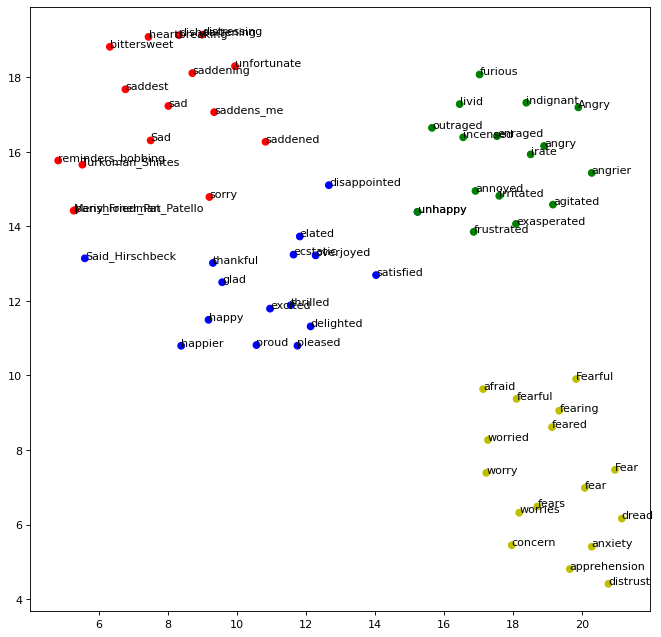

In [71]:
# Answer here
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

word_list = ['happy', 'angry', 'sad', 'fear']

topn = 15

happy_words = ['happy'] + [word_ for word_, sim_ in w2v_google_model.most_similar('happy', topn=topn)]
angry_words = ['angry'] + [word_ for word_, sim_ in w2v_google_model.most_similar('angry', topn=topn)]
sad_words = ['sad'] + [word_ for word_, sim_ in w2v_google_model.most_similar('sad', topn=topn)]
fear_words = ['fear'] + [word_ for word_, sim_ in w2v_google_model.most_similar('fear', topn=topn)]

target_words = happy_words + angry_words + sad_words + fear_words
cn = topn + 1
color = ['b'] * cn + ['g'] * cn + ['r'] * cn + ['y'] * cn

model = w2v_google_model
size = 200
target_size = len(target_words)
all_word = list(model.index_to_key)
word_train = target_words + all_word[:size]
X_train = model[word_train]
tsne = TSNE(n_components=2, metric='cosine', random_state=28)
X_tsne = tsne.fit_transform(X_train)

plt.figure(figsize=(10, 10), dpi=80)
plt.scatter(X_tsne[:target_size, 0], X_tsne[:target_size, 1], c=color)
for label, x, y in zip(target_words, X_tsne[:target_size, 0], X_tsne[:target_size, 1]):
    plt.annotate(label, xy=(x, y), xytext=(0, 0), textcoords='offset points')
plt.show()


# Part2

In [72]:
### Begin Assignment Here

In [73]:
import pandas as pd
import numpy as np
import nltk
from nltk.corpus import stopwords
import regex as re
from nltk.stem import WordNetLemmatizer
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import f1_score, classification_report

In [74]:
# Load raw data from Twitter
emotion_df = pd.read_csv('C:\\Users\\user\\Desktop\\DMLab2\\DM2023-Lab2-Master\\Homework\\emotion.csv')
emotion_df

,tweet_id,emotion
0,0x3140b1,sadness
1,0x368b73,disgust
2,0x296183,anticipation
3,0x2bd6e1,joy
4,0x2ee1dd,anticipation
...,...,...
1455558,0x38dba0,joy
1455559,0x300ea2,joy
1455560,0x360b99,fear
1455561,0x22eecf,joy


In [75]:
data_identification_df = pd.read_csv('C:\\Users\\user\\Desktop\\DMLab2\\DM2023-Lab2-Master\\Homework\\data_identification.csv')
data_identification_df

,tweet_id,identification
0,0x28cc61,test
1,0x29e452,train
2,0x2b3819,train
3,0x2db41f,test
4,0x2a2acc,train
...,...,...
1867530,0x227e25,train
1867531,0x293813,train
1867532,0x1e1a7e,train
1867533,0x2156a5,train


In [76]:
import json

id_list = []
hashtags_list = []
text_list = []
score_list = []

with open('C:\\Users\\user\\Desktop\\DMLab2\\DM2023-Lab2-Master\\Homework\\tweets_DM.json', 'r') as f:
    into_list = f.readlines()
    for data_json in into_list:
        data = json.loads(data_json)
        score_list.append(data['_score'])
        id_list.append(data['_source']['tweet']['tweet_id'])
        text_list.append(data['_source']['tweet']['text'])

        # Check if 'hashtags' is present in the data
        if 'hashtags' in data['_source']['tweet']:
            hashtags_list.append(data['_source']['tweet']['hashtags'])
        else:
            hashtags_list.append(None)

data_tweet = {"tweet_id": id_list, "hashtags": hashtags_list, "text": text_list, "score": score_list}
tweets_df = pd.DataFrame(data_tweet)
tweets_df.head(25)


,tweet_id,hashtags,text,score
0,0x376b20,[Snapchat],"People who post ""add me on #Snapchat"" must be ...",391
1,0x2d5350,"[freepress, TrumpLegacy, CNN]","@brianklaas As we see, Trump is dangerous to #...",433
2,0x28b412,[bibleverse],"Confident of your obedience, I write to you, k...",232
3,0x1cd5b0,[],Now ISSA is stalking Tasha 😂😂😂 <LH>,376
4,0x2de201,[],"""Trust is not the same as faith. A friend is s...",989
5,0x1d755c,"[authentic, LaughOutLoud]",@RISKshow @TheKevinAllison Thx for the BEST TI...,120
6,0x2c91a8,[],Still waiting on those supplies Liscus. <LH>,1021
7,0x368e95,[],Love knows no gender. 😢😭 <LH>,481
8,0x249c0c,[LeagueCup],@DStvNgCare @DStvNg More highlights are being ...,827
9,0x218443,"[materialism, money, possessions]",When do you have enough ? When are you satisfi...,66


In [77]:
# Merge dataframes based on tweet_id
merged_df = pd.merge(tweets_df, emotion_df, on='tweet_id',how= 'outer')
merged_df = pd.merge(merged_df, data_identification_df, on='tweet_id',how= 'outer')
merged_df.head(50)  

,tweet_id,hashtags,text,score,emotion,identification
0,0x376b20,[Snapchat],"People who post ""add me on #Snapchat"" must be ...",391,anticipation,train
1,0x2d5350,"[freepress, TrumpLegacy, CNN]","@brianklaas As we see, Trump is dangerous to #...",433,sadness,train
2,0x28b412,[bibleverse],"Confident of your obedience, I write to you, k...",232,NaN,test
3,0x1cd5b0,[],Now ISSA is stalking Tasha 😂😂😂 <LH>,376,fear,train
4,0x2de201,[],"""Trust is not the same as faith. A friend is s...",989,NaN,test
5,0x1d755c,"[authentic, LaughOutLoud]",@RISKshow @TheKevinAllison Thx for the BEST TI...,120,joy,train
6,0x2c91a8,[],Still waiting on those supplies Liscus. <LH>,1021,anticipation,train
7,0x368e95,[],Love knows no gender. 😢😭 <LH>,481,joy,train
8,0x249c0c,[LeagueCup],@DStvNgCare @DStvNg More highlights are being ...,827,sadness,train
9,0x218443,"[materialism, money, possessions]",When do you have enough ? When are you satisfi...,66,NaN,test


In [78]:
merged_df.to_csv('C:\\Users\\user\\Desktop\\DMLab2\\DM2023-Lab2-Master\\Homework\\merged_df.csv')

## Data Preprocessing

In [79]:
df = merged_df

In [80]:
nltk.download('wordnet')
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('omw-1.4')
lemmatizer = WordNetLemmatizer()

def clean_text(text):
    text = re.sub(r'[<LH>"\'.,@]', ' ', text)
    text = re.sub(r'\s+', ' ', text) 
    text = text.lower()
    tokens = [lemmatizer.lemmatize(word) for word in text.split() if word.lower() not in set(stopwords.words('english'))]
    return ' '.join(tokens)
    
df['text'] = df['text'].apply(clean_text)


[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...

KeyboardInterrupt



In [81]:
# df.to_csv('df_new.csv')

In [82]:
df_new=pd.read_csv('C:\\Users\\user\\Desktop\\DMLab2\\DM2023-Lab2-Master\\Homework\\df_new.csv')

In [83]:
df_new.head(25)

,Unnamed: 0,tweet_id,hashtags,text,score,emotion,identification
0,0,0x376b20,['Snapchat'],people post add #snapchat must dehydrated cuz man,391,anticipation,train
1,1,0x2d5350,"['freepress', 'TrumpLegacy', 'CNN']",brianklaas see trump dangerous #freepress arou...,433,sadness,train
2,2,0x28b412,['bibleverse'],confident obedience write knowing even ask (ph...,232,NaN,test
3,3,0x1cd5b0,[],issa stalking tasha 😂😂😂,376,fear,train
4,4,0x2de201,[],trust faith friend someone trust putting faith...,989,NaN,test
5,5,0x1d755c,"['authentic', 'LaughOutLoud']",riskshow thekevinallison thx best time tonight...,120,joy,train
6,6,0x2c91a8,[],still waiting supply iscus,1021,anticipation,train
7,7,0x368e95,[],ove know gender 😢😭,481,joy,train
8,8,0x249c0c,['LeagueCup'],dstvngcare dstvng highlight shown actual sport...,827,sadness,train
9,9,0x218443,"['materialism', 'money', 'possessions']",enough ? satisfied ? goal really money ? #mate...,66,NaN,test


In [84]:
df_new.drop(['Unnamed: 0'],axis=1,inplace=True)

In [85]:
df_train = df_new[df_new['identification'] == 'train']
df_test = df_new[df_new['identification'] == 'test']

In [86]:
df_train['text'] = df_train['text'].astype(str)
df_train['text'].dropna(inplace=True)
df_test['text'] = df_test['text'].astype(str)
df_test['text'].dropna(inplace=True)
print(df_test['text'].dtype)

object


In [87]:
from tqdm import tqdm
from gensim.models import Word2Vec
from scipy import sparse
!pip install gensim
!pip install smart_open
!pip install tqdm

tokenized_texts = [nltk.word_tokenize(text) for text in tqdm(df_train['text'])]
model = Word2Vec(sentences=tokenized_texts, vector_size=100, window=5, min_count=1, workers=4)

def calculate_doc_vector(tokens, model):
    vector = [model.wv[token] for token in tokens if token in model.wv]
    return sum(vector) / len(vector) if vector else [0] * model.vector_size

X_train = [calculate_doc_vector(tokens, model) for tokens in tqdm(tokenized_texts)]
X_train = sparse.csr_matrix(X_train)

y_train = df_train['emotion']

tokenized_test_texts = [nltk.word_tokenize(str(text)) for text in tqdm(df_test['text'])]
tokenized_test_texts = [nltk.word_tokenize(text) for text in tqdm(df_test['text'])]
X_test = [calculate_doc_vector(tokens, model) for tokens in tqdm(tokenized_test_texts)]
X_test = sparse.csr_matrix(X_test)
y_test = df_test['emotion']

100%|███████████████████████████████████████████████████████████████████████| 411972/411972 [00:21<00:00, 19055.93it/s]


In [88]:
sparse.save_npz("C:\\Users\\user\\Desktop\\DMLab2\\DM2023-Lab2-Master\\Homework\\X_train_word2vec.npz", X_train)
sparse.save_npz("C:\\Users\\user\\Desktop\\DMLab2\\DM2023-Lab2-Master\\Homework\\X_test_word2vec.npz", X_test)

# Print shapes
print('X_train.shape:', X_train.shape)
print('y_train.shape:', y_train.shape)
print('X_test.shape:', X_test.shape)
print('y_test.shape:', y_test.shape)

X_train.shape: (1455563, 100)
y_train.shape: (1455563,)
X_test.shape: (411972, 100)
y_test.shape: (411972,)


In [89]:
from scipy import sparse
X_train = sparse.load_npz("C:\\Users\\user\\Desktop\\DMLab2\\DM2023-Lab2-Master\\Homework\\X_train_word2vec.npz")
y_train = df_train['emotion']
X_test = sparse.load_npz("C:\\Users\\user\\Desktop\\DMLab2\\DM2023-Lab2-Master\\Homework\\X_test_word2vec.npz")
y_test = df_test['emotion']

In [ ]:
!pip install xgboost
from sklearn.preprocessing import LabelEncoder
from xgboost import XGBClassifier
from sklearn.metrics import classification_report

label_encoder = LabelEncoder()

y_train_encoded = label_encoder.fit_transform(y_train)

clf = XGBClassifier(
    learning_rate=0.1697325181634968,
    n_estimators=237,
    max_depth=10,
    subsample=0.8002331835265317,
    colsample_bytree=0.8116300013989355
)

clf.fit(X_train, y_train_encoded)
y_train_pred_encoded = clf.predict(X_train)
y_train_pred = label_encoder.inverse_transform(y_train_pred_encoded)
y_test_pred_encoded = clf.predict(X_test)
y_test_pred = label_encoder.inverse_transform(y_test_pred_encoded)

print(classification_report(y_true=y_train, y_pred=y_train_pred))


In [ ]:
y_test_pred=pd.DataFrame(y_test_pred)
y_submit=df_test.copy()
y_submit['emotion']=list(y_test_pred[0])
y_submit.drop(labels=['text','score','identification','hashtags'],axis=1,inplace=True)
y_submit.rename(columns={"tweet_id": "id"},inplace=True)
y_submit

In [ ]:
del df_test['emotion']
del df_test['hashtags']
del df_test['score']
del df_test['identification']
df_test

In [ ]:
add=df_test[df_test['text'].isna()].copy()
del add['text']
add['emotion']='joy'
add.rename(columns={'tweet_id':'id'},inplace=True)
y_submit=pd.concat([y_submit,add])

In [ ]:
y_submit

In [ ]:
y_submit.to_csv('XGB2.csv',index=False)